In [123]:
# libs
import pandas as pd
import numpy as np
from datetime import datetime
import os
from tqdm import tqdm  # Import the tqdm function to visualize the progress of the loop

# bar plots
import matplotlib.pyplot as plt
import seaborn as sns

# TradingView (Data Load)

In [124]:
# today's date string for file namine automation
# today_date_str = datetime.now().strftime("_%Y-%m-%d.csv")
today_date_str = datetime.now().strftime("_%Y-%m-29.csv")
print(today_date_str)

_2024-02-29.csv


In [125]:
# cocncat base file name with today's date string
filename = f"trading_view_raw_data/tv_screen_gap-up{today_date_str}"

# read in trading view raw data
trading_view_raw_df = pd.read_csv(filename)

print(f'{len(trading_view_raw_df.index)} U.S. Stocks \n$(pre-market change) > $0.00 USD')
trading_view_raw_df.head(5)

1968 U.S. Stocks 
$(pre-market change) > $0.00 USD


,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Open,Pre-market Open - Currency,Pre-market Change,...,Relative Volume 1 minute,Relative Volume 5 minutes,Relative Volume 15 minutes,Relative Volume 30 minutes,Relative Volume 1 hour,Relative Volume 2 hours,Relative Volume 4 hours,Relative Volume 1 day,Relative Volume 1 week,Relative Volume 1 month
0,MSFT,Microsoft Corporation,NASDAQ,3044619688433.315,USD,409.7498,USD,405.99,USD,0.93,...,0.003111,0.6152751,2.06775164,4.64372452,1.93620062,1.14503216,0.45399198,0.14561989,0.44358748,0.76596883
1,NVDA,NVIDIA Corporation,NASDAQ,1990875012516.9575,USD,796.3500,USD,773.10,USD,14.31,...,0.001124,0.24948078,2.21813941,4.1161605,2.01894127,1.01006685,0.32218449,0.16740949,0.6319595,1.0997833
2,GOOG,Alphabet Inc.,NASDAQ,1730044155537.2178,USD,139.7300,USD,137.01,USD,0.96,...,0.002806,0.20531851,0.92141598,1.77117077,1.02981769,0.60892544,0.33176544,0.17553615,0.94797939,0.92173886
3,GOOGL,Alphabet Inc.,NASDAQ,1729639569627.8755,USD,138.6300,USD,135.92,USD,0.94,...,0.005767,0.23959501,1.29224337,2.49291023,1.27724181,0.68223387,0.36264381,0.19919481,1.00569294,0.97416549
4,META,"Meta Platforms, Inc.",NASDAQ,1248571203261.7717,USD,489.7500,USD,483.74,USD,4.23,...,0.003306,0.49012763,1.3069932,3.05118543,1.27639357,0.79314904,0.28605413,0.10566384,0.42064,1.02485917


In [126]:
# # first 10 rows df
# trading_view_raw_df_testing = trading_view_raw_df.head(10)
# # save to csv
# trading_view_raw_df_testing.to_csv('trading_view_raw_data/tv_screen_gap-up_testing.csv', index=False)
# # make sure data is there at least
# print(len(trading_view_raw_df_testing.index))

# # print test df
# trading_view_raw_df_testing

In [127]:
# # baseline raw cols from trading view initial filter
# features_raw_all = trading_view_raw_df.columns
# # convert to list
# features_raw_all = features_raw_all.tolist()
# # look at the trading view columns
# print(features_raw_all)

In [128]:
"""
define function -> add new column and marketCapType based on 'Market capitalization' column

criteria (6 groupings):
200B and above = 'Titans' - 1
10B to 200B = 'Large caps' - 2
2B to 10B = 'Midlers' - 3
300M to 2B = 'Small caps' - 4
300m and below = 'Micro caps' - 5
50m and below = 'Shrimp' - 6

"""

"\ndefine function -> add new column and marketCapType based on 'Market capitalization' column\n\ncriteria (6 groupings):\n200B and above = 'Titans' - 1\n10B to 200B = 'Large caps' - 2\n2B to 10B = 'Midlers' - 3\n300M to 2B = 'Small caps' - 4\n300m and below = 'Micro caps' - 5\n50m and below = 'Shrimp' - 6\n\n"

In [129]:
def categorize_market_cap(df):
    # Convert 'Market capitalization' to numeric, coercing errors to NaN
    df['Market capitalization'] = pd.to_numeric(df['Market capitalization'], errors='coerce')
    
    # Define the conditions for each market cap category using regular number notation
    conditions = [
        # Titans
        (df['Market capitalization'] >= 200000000000),  # 200 billion and above

        #Large Cap
        (df['Market capitalization'] >= 10000000000) & (df['Market capitalization'] < 200000000000),  # 10 billion to 200 billion
        
        # Midlers
        (df['Market capitalization'] >= 2000000000) & (df['Market capitalization'] < 10000000000),  # 2 billion to 10 billion
        
        # Small Cap
        (df['Market capitalization'] >= 300000000) & (df['Market capitalization'] < 2000000000),  # 300 million to 2 billion
       
        # Micro Cap
        (df['Market capitalization'] > 50000000) & (df['Market capitalization'] < 300000000),  # 300 million and below (excluding 50 million and below)
       
        # Shrimp
        (df['Market capitalization'] <= 50000000)  # 50 million and below
    ]
    
    # Define the category names corresponding to each condition
    categories = ['Titans', 'Large caps', 'Midlers', 'Small caps', 'Micro caps', 'Shrimp']
    
    # Use np.select to assign categories based on conditions
    df['marketCapType'] = np.select(conditions, categories, default='Undefined')
    
    return df


In [130]:
# EXECUTE
trading_view_raw_df = categorize_market_cap(trading_view_raw_df)
trading_view_raw_df.head(5)

,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Open,Pre-market Open - Currency,Pre-market Change,...,Relative Volume 5 minutes,Relative Volume 15 minutes,Relative Volume 30 minutes,Relative Volume 1 hour,Relative Volume 2 hours,Relative Volume 4 hours,Relative Volume 1 day,Relative Volume 1 week,Relative Volume 1 month,marketCapType
0,MSFT,Microsoft Corporation,NASDAQ,3.044620e+12,USD,409.7498,USD,405.99,USD,0.93,...,0.6152751,2.06775164,4.64372452,1.93620062,1.14503216,0.45399198,0.14561989,0.44358748,0.76596883,Titans
1,NVDA,NVIDIA Corporation,NASDAQ,1.990875e+12,USD,796.3500,USD,773.10,USD,14.31,...,0.24948078,2.21813941,4.1161605,2.01894127,1.01006685,0.32218449,0.16740949,0.6319595,1.0997833,Titans
2,GOOG,Alphabet Inc.,NASDAQ,1.730044e+12,USD,139.7300,USD,137.01,USD,0.96,...,0.20531851,0.92141598,1.77117077,1.02981769,0.60892544,0.33176544,0.17553615,0.94797939,0.92173886,Titans
3,GOOGL,Alphabet Inc.,NASDAQ,1.729640e+12,USD,138.6300,USD,135.92,USD,0.94,...,0.23959501,1.29224337,2.49291023,1.27724181,0.68223387,0.36264381,0.19919481,1.00569294,0.97416549,Titans
4,META,"Meta Platforms, Inc.",NASDAQ,1.248571e+12,USD,489.7500,USD,483.74,USD,4.23,...,0.49012763,1.3069932,3.05118543,1.27639357,0.79314904,0.28605413,0.10566384,0.42064,1.02485917,Titans


In [131]:
# # check for NaNs
# print(trading_view_raw_df.isna().sum())

In [132]:
# drop NaNs
tv_df = trading_view_raw_df.dropna()
# get simple count of NaNs total. should be 0
print(f'NaNs = {tv_df.isna().sum().sum()}')

# if there are no NaNs, print "No NaNs in DataFrame! Success!", else print the NaN count and "There are x NaNs in DataFrame, check your code dumb dumb!"
if tv_df.isna().sum().sum() == 0:
    nan_count = tv_df.isna().sum().sum()
    print(f"There are zero {nan_count} NaNs in DataFrame! Nice work!")
else:
    print(f"There are {tv_df.isna().sum().sum()} NaNs in DataFrame, check your code dumb dumb!")


NaNs = 0
There are zero 0 NaNs in DataFrame! Nice work!


In [133]:
mc_groups = trading_view_raw_df['marketCapType'].value_counts().reset_index()
mc_groups.columns = ['marketCapType', 'count']  # Rename columns for clarity

# Calculate percentage for each market cap type and add it to the DataFrame
mc_groups['percentage'] = (mc_groups['count'] / mc_groups['count'].sum()) * 100

# print total "there are etc."
print(f'There are still the same {len(trading_view_raw_df.index)} U.S. Stocks in the dataframe \n$(pre-market change) > $0.00 USD')
# Display the enhanced DataFrame
mc_groups

There are still the same 1968 U.S. Stocks in the dataframe 
$(pre-market change) > $0.00 USD


,marketCapType,count,percentage
0,Small caps,485,24.644309
1,Midlers,466,23.678862
2,Large caps,426,21.646341
3,Shrimp,291,14.786585
4,Micro caps,254,12.906504
5,Titans,27,1.371951
6,Undefined,19,0.965447


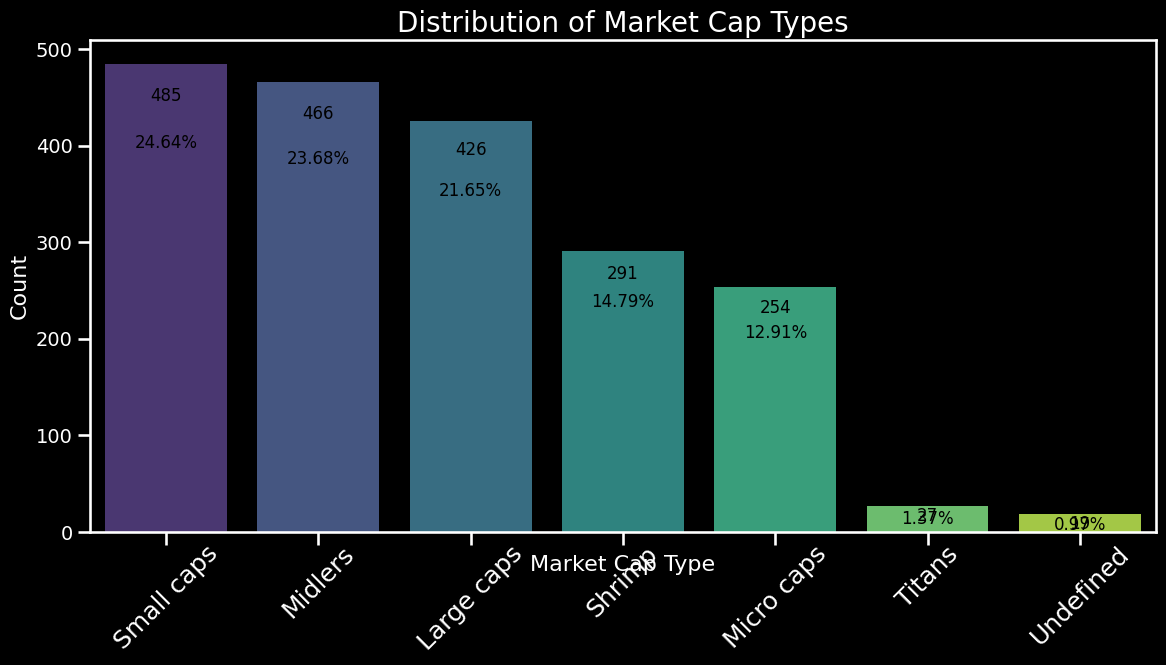

In [134]:
# Set dark mode for plotting
plt.style.use('dark_background')
sns.set_context('talk')  # Larger fonts and figures

# Create a bar chart
plt.figure(figsize=(12, 7))
barplot = sns.barplot(data=mc_groups, x='marketCapType', y='count', hue='marketCapType', palette='viridis', dodge=False)

# Disable the legend
plt.legend([],[], frameon=False)

# Customize the plot with count and percentage labels inside the bars
for index, row in mc_groups.iterrows():
    # Calculate the position for the count and percentage text to be inside the bar
    height = row['count']
    offset = height * 0.05  # Offset from the top of the bar for better visibility
    
    # Display the count inside the bar at the top
    barplot.text(index, height - offset, f'{row["count"]}', color='black', ha="center", va="top", fontsize=12)
    
    # Display the percentage just below the count, inside the bar
    # Adjust the vertical position slightly below the count
    percentage_offset = height * 0.15  # Adjust this value as needed to fit inside the bar
    barplot.text(index, height - percentage_offset, f'{row["percentage"]:.2f}%', color='black', ha="center", va="top", fontsize=12)

# Add marketCapType labels underneath the bars
for index, row in mc_groups.iterrows():
    barplot.text(index, -10, row['marketCapType'], color='white', ha="center", va="top", rotation=45)

plt.title('Distribution of Market Cap Types', fontsize=20, color='white')
plt.xlabel('Market Cap Type', fontsize=16, color='white')
plt.ylabel('Count', fontsize=16, color='white')
plt.xticks(rotation=45, fontsize=14, color='white')
plt.yticks(fontsize=14, color='white')

# Remove x-axis labels to avoid redundancy
barplot.set_xticklabels([])

# Show the plot
plt.tight_layout()
plt.show()


In [135]:
# print length of df
print(f'{len(tv_df.index)} U.S. Stocks \n$(pre-market change) > $0.00 USD')
# print sample head
tv_df.sample(5)

1949 U.S. Stocks 
$(pre-market change) > $0.00 USD


,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Open,Pre-market Open - Currency,Pre-market Change,...,Relative Volume 5 minutes,Relative Volume 15 minutes,Relative Volume 30 minutes,Relative Volume 1 hour,Relative Volume 2 hours,Relative Volume 4 hours,Relative Volume 1 day,Relative Volume 1 week,Relative Volume 1 month,marketCapType
596,SON,Sonoco Products Company,NYSE,5.560003e+09,USD,56.7600,USD,56.65,USD,0.12,...,0.15751883,0.42072605,1.52528838,0.79266268,0.47642804,0.22790872,0.06326625,0.74407935,0.86621157,Midlers
1436,HOWL,"Werewolf Therapeutics, Inc.",NASDAQ,2.573233e+08,USD,7.1099,USD,6.40,USD,0.10,...,0.15640306,2.52425662,1.30626368,1.00540474,0.84591112,0.57093924,0.32628008,0.94144488,0.63766501,Micro caps
1762,INDP,"Indaptus Therapeutics, Inc.",NASDAQ,1.872593e+07,USD,2.2290,USD,2.29,USD,0.20,...,0.35359314,0.76562608,7.93329469,6.59842753,4.29934997,1.14035931,2.60989886,2.53370063,0.75336922,Shrimp
903,CNK,"Cinemark Holdings, Inc.",NYSE,2.099853e+09,USD,17.2700,USD,17.39,USD,0.21,...,0.28567545,1.22378401,1.41620595,0.77703082,0.50817207,0.2384632,0.0726772,0.78134653,1.21839721,Midlers
1341,NCMI,"National CineMedia, Inc.",NASDAQ,4.045611e+08,USD,4.1800,USD,4.09,USD,0.04,...,0.01808547,0.14439327,0.33616637,0.18473705,0.12200551,0.07186123,0.03869292,0.49781847,0.3964123,Small caps


In [136]:
# show unique values for 'marketCapType'
print(tv_df['marketCapType'].unique())
print()
# get tv_df columns
print(tv_df.columns)

['Titans' 'Large caps' 'Midlers' 'Small caps' 'Micro caps' 'Shrimp']

Index(['Symbol', 'Description', 'Exchange', 'Market capitalization',
       'Market capitalization - Currency', 'Price', 'Price - Currency',
       'Pre-market Open', 'Pre-market Open - Currency', 'Pre-market Change',
       'Pre-market Change - Currency', 'Pre-market Change %',
       'Pre-market Gap %', 'Float shares outstanding', 'Volume 1 day',
       'Volume 1 week', 'Pre-market Volume', 'Average Volume 10 days',
       'Average Volume 30 days', 'Average Volume 90 days', 'Volatility 1 day',
       'Volatility 1 week', 'Volatility 1 month',
       'Volume Weighted Average Price 1 day', 'Price to earnings ratio',
       'Sector', 'Relative Volume at Time', 'Beta 1 year', 'Beta 3 years',
       'Beta 5 years', 'Relative Volume 1 minute', 'Relative Volume 5 minutes',
       'Relative Volume 15 minutes', 'Relative Volume 30 minutes',
       'Relative Volume 1 hour', 'Relative Volume 2 hours',
       'Relative Volume 

In [137]:
# drop undefined
tv_df = tv_df[tv_df['marketCapType'] != 'Undefined']

mc_groups2 = tv_df['marketCapType'].value_counts().reset_index()
mc_groups2.columns = ['marketCapType', 'count']  # Rename columns for clarity

# calculate percentage for each market cap type and add it to the DataFrame
mc_groups2['percentage'] = (mc_groups2['count'] / mc_groups2['count'].sum()) * 100

mc_groups2
print(mc_groups2)


  marketCapType  count  percentage
0    Small caps    485   24.884556
1       Midlers    466   23.909697
2    Large caps    426   21.857363
3        Shrimp    291   14.930734
4    Micro caps    254   13.032324
5        Titans     27    1.385326


In [138]:
# 1/3 #### CONFIG DATA SECTION ####
criteria_config = {
    "Titans": {
        "pre_market_change_pct_threshold": 0.002,  # Reduced to 0.2% for Titans
        "float_shares_outstanding_threshold": 1000000000,  # Increased to 1 billion shares
        "relative_volume_threshold": 1.2,  # Slightly more inclusive
        "relative_volume_at_time_threshold": 0.03,  # More inclusive
        "pre_market_gap_percentage_threshold": 0.001,  # Reduced to 0.1%
        "pre_market_vmap_drawdown_threshold": 0.003  # .3% drawdown from VWAP
    },
    "Large caps": {
        "pre_market_change_pct_threshold": 0.005,  # Reduced to 0.5% for Large caps
        "float_shares_outstanding_threshold": 200000000,  # Increased to 200 million shares
        "relative_volume_threshold": 1.3,  # Slightly more inclusive
        "relative_volume_at_time_threshold": 0.04,  # More inclusive
        "pre_market_gap_percentage_threshold": 0.005,  # Reduced to 0.5%
        "pre_market_vmap_drawdown_threshold": 0.004  # .4% drawdown from VWAP
    },
    "Midlers": {
        "pre_market_change_pct_threshold": 0.02,  # 2% for Mid caps
        "float_shares_outstanding_threshold": 50000000,  # 50 million shares
        "relative_volume_threshold": 1.3,
        "relative_volume_at_time_threshold": .05,
        "pre_market_gap_percentage_threshold": .02,
        "pre_market_vmap_drawdown_threshold": 0.005  # .5% drawdown from VWAP
    },
    "Small caps": {
        "pre_market_change_pct_threshold": 0.03,  # 3% for Small caps
        "float_shares_outstanding_threshold": 20000000,  # 20 million shares
        "relative_volume_threshold": 1.2,
        "relative_volume_at_time_threshold": .05,
        "pre_market_gap_percentage_threshold": .03,
        "pre_market_vmap_drawdown_threshold": 0.006  # 6% drawdown from VWAP
    },
    "Micro caps": {
        "pre_market_change_pct_threshold": 0.04,  # 4% for Micro caps
        "float_shares_outstanding_threshold": 5000000,  # 5 million shares
        "relative_volume_threshold": 1.1,
        "relative_volume_at_time_threshold": .05,
        "pre_market_gap_percentage_threshold": .04,
        "pre_market_vmap_drawdown_threshold": 0.007  # 7% drawdown from VWAP
    },
    "Shrimp": {
        "pre_market_change_pct_threshold": 0.05,  # 5% for Shrimp
        "float_shares_outstanding_threshold": 1000000,  # 1 million shares
        "relative_volume_threshold": 1.0,
        "relative_volume_at_time_threshold": .05,
        "pre_market_gap_percentage_threshold": .05,
        "pre_market_vmap_drawdown_threshold": 0.008  # 8% drawdown from VWAP
    }
}

# 2/3 #### CORE FUNCTIONS ####
def filter_by_pre_market_change(df, change_pct_threshold):
    """Filter stocks by pre-market change percentage."""
    return df[df['Pre-market Change %'] >= change_pct_threshold]

def filter_by_float_shares(df, float_shares_threshold):
    """Filter stocks by float shares outstanding."""
    # create a copy to safely modify without affecting the original DataFrame
    modified_df = df.copy()
    modified_df['Float shares outstanding'] = pd.to_numeric(modified_df['Float shares outstanding'], errors='coerce')
    return modified_df[modified_df['Float shares outstanding'] <= float_shares_threshold]

def filter_by_relative_volume(df, relative_volume_threshold):
    """Filter stocks by relative volume."""
    df['Relative Volume 1 day'] = pd.to_numeric(df['Relative Volume 1 day'], errors='coerce')
    return df[df['Relative Volume 1 day'] >= relative_volume_threshold]

def filter_by_relative_volume_at_time(df, relative_volume_at_time_threshold):
    """Filter stocks by relative volume at a specific time."""
    # Convert 'Relative Volume at Time' to float
    df['Relative Volume at Time'] = pd.to_numeric(df['Relative Volume at Time'], errors='coerce')
    return df[df['Relative Volume at Time'] >= relative_volume_at_time_threshold]

def filter_by_pre_market_gap_percentage(df, pre_market_gap_percentage_threshold):
    """Filter stocks by pre-market gap percentage."""
    return df[df['Pre-market Gap %'] >= pre_market_gap_percentage_threshold]

def filter_by_price_near_vwap(df, pre_market_vmap_drawdown_threshold):
    """
    Filter stocks where the price is near the VWAP, considering the specified drawdown threshold.
    """
    df_filtered = df.copy()
    df_filtered['Price'] = pd.to_numeric(df_filtered['Price'], errors='coerce')
    df_filtered['Volume Weighted Average Price 1 day'] = pd.to_numeric(df_filtered['Volume Weighted Average Price 1 day'], errors='coerce')
    
    # Calculate the acceptable minimum price based on the VWAP drawdown threshold
    df_filtered['Min Price from VWAP'] = df_filtered['Volume Weighted Average Price 1 day'] * (1 - pre_market_vmap_drawdown_threshold)
    
    # Apply the filter
    df_filtered = df_filtered[df_filtered['Price'] >= df_filtered['Min Price from VWAP']]
    
    return df_filtered.drop(columns=['Min Price from VWAP'])

"""SPECIAL FILTERS"""
def filter_by_volatility(df):
    """Filter stocks based on recent volatility being higher than weekly and monthly averages."""
    # Ensure data types are correct; convert to numeric if necessary
    df['Volatility 1 day'] = pd.to_numeric(df['Volatility 1 day'], errors='coerce')
    df['Volatility 1 week'] = pd.to_numeric(df['Volatility 1 week'], errors='coerce')
    df['Volatility 1 month'] = pd.to_numeric(df['Volatility 1 month'], errors='coerce')
    filtered_df = df[
        (df['Volatility 1 day'] >= df['Volatility 1 week']) & 
        (df['Volatility 1 day'] >= df['Volatility 1 month'])]
    return filtered_df

# def filter_by_price_above_vwap(df):
#     """Filter stocks where the price is greater than the VWAP 1 day."""
#     # Ensure data types are correct; convert to numeric if necessary
#     df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
#     df['Volume Weighted Average Price 1 day'] = pd.to_numeric(df['Volume Weighted Average Price 1 day'], errors='coerce')
    
#     # Apply the filter
#     filtered_df = df[df['Price'] > df['Volume Weighted Average Price 1 day']]
#     return filtered_df

# 3/3 #### WRAPPER FUNCTION ####
def screen_stocks_by_category(df, category):
    """Screen stocks based on their market cap category."""
    # 3a. Get the configuration for the specified category
    config = criteria_config.get(category, {})
    pre_market_change_pct_threshold = config.get("pre_market_change_pct_threshold", 0)
    float_shares_threshold = config.get("float_shares_outstanding_threshold", float('inf'))
    relative_volume_threshold = config.get("relative_volume_threshold", 0)
    relative_volume_at_time_threshold = config.get("relative_volume_at_time_threshold", 0)
    pre_market_gap_percentage_threshold = config.get("pre_market_gap_percentage_threshold", 0)
    pre_market_vmap_drawdown_threshold = config.get("pre_market_vmap_drawdown_threshold", 0)
    # 3b. Apply the filters
    filtered_df = filter_by_pre_market_change(df, pre_market_change_pct_threshold)
    filtered_df = filter_by_float_shares(filtered_df, float_shares_threshold)
    filtered_df = filter_by_relative_volume(filtered_df, relative_volume_threshold)
    filtered_df = filter_by_relative_volume_at_time(filtered_df, relative_volume_at_time_threshold)
    filtered_df = filter_by_volatility(filtered_df) # SPECIAL FILTER
    # filtered_df = filter_by_price_above_vwap(filtered_df) # SPECIAL FILTER
    filtered_df = filter_by_pre_market_gap_percentage(filtered_df, pre_market_gap_percentage_threshold)
    filtered_df = filter_by_price_near_vwap(filtered_df, pre_market_vmap_drawdown_threshold)
  
    # 3c. Return the filtered DataFrame
    return filtered_df

In [139]:
#EXECUTE
tv_L2_df = pd.DataFrame()
categories = tv_df['marketCapType'].unique()

for category in categories:
    category_df = tv_df[tv_df['marketCapType'] == category]
    screened_df = screen_stocks_by_category(category_df, category)
    tv_L2_df = pd.concat([tv_L2_df, screened_df])

# Display results
print(f'Original DataFrame length: {len(tv_df.index)}')
print(f'Number of rows removed: {len(tv_df.index) - len(tv_L2_df.index)}')
print(f'NEW DataFrame length: {len(tv_L2_df.index)}')

# filter in descending order by market cap and then by pre-market change percentage
tv_L2_df = tv_L2_df.sort_values(by=['Market capitalization', 'Pre-market Change %'], ascending=[False, False])
# reset index and drop
tv_L2_df = tv_L2_df.reset_index(drop=True)
# display head
display(tv_L2_df.head(20))

Original DataFrame length: 1949
Number of rows removed: 1945
NEW DataFrame length: 4


,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Open,Pre-market Open - Currency,Pre-market Change,...,Relative Volume 5 minutes,Relative Volume 15 minutes,Relative Volume 30 minutes,Relative Volume 1 hour,Relative Volume 2 hours,Relative Volume 4 hours,Relative Volume 1 day,Relative Volume 1 week,Relative Volume 1 month,marketCapType
0,OKTA,"Okta, Inc.",NASDAQ,1.827761e+10,USD,110.5420,USD,107.07,USD,20.65,...,0.49127958,3.02616643,17.65235778,10.74339088,8.33095705,5.3002582,2.047812,1.85452922,0.85578511,Large caps
1,DUOL,"Duolingo, Inc.",NASDAQ,9.844751e+09,USD,234.1550,USD,237.00,USD,44.49,...,0.24704312,1.66495137,17.16535868,8.13997292,5.0288557,3.36720831,1.555617,1.86261149,0.98818719,Midlers
2,ITRN,Ituran Location and Control Ltd.,NASDAQ,5.517771e+08,USD,27.4400,USD,26.25,USD,0.60,...,13.96440512,13.60559876,22.46231156,11.10559006,6.41276131,4.10121605,1.576898,1.10316747,0.82242826,Small caps
3,VLCN,"Volcon, Inc.",NASDAQ,5.728348e+05,USD,2.0099,USD,1.69,USD,0.62,...,0.66010323,5.15708493,22.10465939,14.47586526,13.2759791,11.60136632,11.340839,17.08027322,69.76105782,Shrimp


In [140]:
# create a breakdown of the market cap types
mc_groups3 = tv_L2_df['marketCapType'].value_counts().reset_index()
mc_groups3.columns = ['marketCapType', 'count']  # Rename columns for clarity
# calculate percentage for each market cap type and add it to the DataFrame
mc_groups3['percentage'] = (mc_groups3['count'] / mc_groups3['count'].sum()) * 100
# Display the enhanced DataFrame
print(mc_groups3)

  marketCapType  count  percentage
0    Large caps      1        25.0
1       Midlers      1        25.0
2    Small caps      1        25.0
3        Shrimp      1        25.0


In [141]:
print(tv_L2_df.columns)
print(len(tv_L2_df.columns))

Index(['Symbol', 'Description', 'Exchange', 'Market capitalization',
       'Market capitalization - Currency', 'Price', 'Price - Currency',
       'Pre-market Open', 'Pre-market Open - Currency', 'Pre-market Change',
       'Pre-market Change - Currency', 'Pre-market Change %',
       'Pre-market Gap %', 'Float shares outstanding', 'Volume 1 day',
       'Volume 1 week', 'Pre-market Volume', 'Average Volume 10 days',
       'Average Volume 30 days', 'Average Volume 90 days', 'Volatility 1 day',
       'Volatility 1 week', 'Volatility 1 month',
       'Volume Weighted Average Price 1 day', 'Price to earnings ratio',
       'Sector', 'Relative Volume at Time', 'Beta 1 year', 'Beta 3 years',
       'Beta 5 years', 'Relative Volume 1 minute', 'Relative Volume 5 minutes',
       'Relative Volume 15 minutes', 'Relative Volume 30 minutes',
       'Relative Volume 1 hour', 'Relative Volume 2 hours',
       'Relative Volume 4 hours', 'Relative Volume 1 day',
       'Relative Volume 1 week', 'R

In [142]:
# slice of first 12 columns
tv_L2_df.iloc[:, :12]

,Symbol,Description,Exchange,Market capitalization,Market capitalization - Currency,Price,Price - Currency,Pre-market Open,Pre-market Open - Currency,Pre-market Change,Pre-market Change - Currency,Pre-market Change %
0,OKTA,"Okta, Inc.",NASDAQ,1.827761e+10,USD,110.5420,USD,107.07,USD,20.65,USD,23.654066
1,DUOL,"Duolingo, Inc.",NASDAQ,9.844751e+09,USD,234.1550,USD,237.00,USD,44.49,USD,22.755869
2,ITRN,Ituran Location and Control Ltd.,NASDAQ,5.517771e+08,USD,27.4400,USD,26.25,USD,0.60,USD,2.318393
3,VLCN,"Volcon, Inc.",NASDAQ,5.728348e+05,USD,2.0099,USD,1.69,USD,0.62,USD,51.239669


In [143]:
# pie chart visual with legend for each of the column metrics and how they are calculated by trading view

In [144]:
# # look at relative volume 1 day
# tv_L2_df.loc[:, ['Symbol','Description', 'Relative Volume 1 day']]

In [145]:
# print(len(tv_L2_df.index))
# tv_L2_df.loc[tv_L2_df['Relative Volume 1 day'] >= 1.0]


In [146]:
# sort descending by change %
# another df and  / or chart market cap representations

# i think you need to go back and filter this shit down more
# chart could be nice to reference, really just need something i can see easy while working

# re-index this shit and keep it clean
# don't be a dumbass and have any data leakage

# you can do a lot more with changes on different very short term time frames

# do i need a calculation for pre-market price????

# you need to figure out implied volatility and noise vs. signal.

# volume vs time avg current >= avg over each time 10,20,30 day etc
# volatility vs time avg >= avg over each time like above

# discretionary tax type of thing that accounts for industry sector implied volatility????
# or might be counterproductive to gap up strategy anyway...

In [147]:
# get that historical data. worry later about grabbing the levels.
# 90 days (1 quarter)
# then look at the 52 and 26 week high and lows. and other common levels 12 week? those are all other potential ket levels
# similar levels to the downside + kill switches, i.e., at loss >= $1000 || 10% below VWAP
# 252 / 4 = 63 trading days per quarter

# IEX Cloud (API)

In [148]:
from datetime import datetime, timedelta
from dotenv import load_dotenv
import requests 

# $ecret shit
load_dotenv()
# iex api key load using python-dotenv lib (pip3 install pythone-dotenv)
iex_key = os.getenv("IEX_API_KEY")

In [149]:
# create a list of 'Symbols' from the tv_L2_df
gap_up_stocks_list = tv_L2_df['Symbol']
gap_up_stocks_list = gap_up_stocks_list.tolist()

# print data
gap_up_stocks_list

['OKTA', 'DUOL', 'ITRN', 'VLCN']

In [150]:
# # STRIVE funds (Vivek)
# strive_funds_list = ['STRV', # Strive 500 ETF
#                      'STXG', # Strive 1000 Growth ETF
#                      'STXV', # Strive 1000 Value ETF
#                      'STXK', # Strive Small-Cap ETF
#                      'STXD', # Strive 1000 Divident Growth ETF
#                      'STXE', # Strive Emerging Markets Ex-China ETF
#                      'DRLL', # Strive U.S. Energy ETF
#                      'SHOC', # Strive U.S. Semiconductor ETF
#                      'FTWO', # Strive FANG 2.0 ETF
#                      'STXT', # Strive Total Return Bond ETF
#                      'BUXX'] # Strive Enhanced Income Short Maturity ETF

In [151]:
# index_baseline_symbols = [
#     'VOO',  # Vanguard S&P 500 ETF
#     'VGT',  # Vanguard Information Technology ETF
#     'VTWO', # Vanguard Russell 2000 ETF
#     'VEA',  # Vanguard Developed Markets Index Fund
#     'VWO',  # Vanguard Emerging Markets Stock Index Fund
#     'BND',  # Vanguard Total Bond Market ETF
#     'VT',   # Vanguard Total World Stock ETF
#     'VNQ',  # Vanguard Real Estate ETF
#     'VCR',  # Vanguard Consumer Discretionary ETF
#     'IWV',  # iShares Russell 3000 ETF
#     'VYM',  # Vanguard High Dividend Yield ETF
#     'XLK',  # Technology Select Sector SPDR Fund
#     'GLD',  # SPDR Gold Shares
#     'IGF',  # iShares Global Infrastructure ETF
#     'ICLN', # iShares Global Clean Energy ETF
#     'EEM',  # iShares MSCI Emerging Markets ETF
#     'BNDX', # Vanguard Total International Bond ETF
#     'XLV',  # Health Care Select Sector SPDR Fund
#     'XLP'   # Consumer Staples Select Sector SPDR Fund
# ]

In [152]:
# baseline S&P 500 indexes for market correlation
sp_indexes_list = ['STRV', # not sure which one to go with or if it matters????
                   'VOO',
                   'SPY']

# extend the dataframe in place (append)
gap_up_stocks_list.extend(sp_indexes_list)

# view data
gap_up_stocks_list

['OKTA', 'DUOL', 'ITRN', 'VLCN', 'STRV', 'VOO', 'SPY']

In [153]:
import requests
import pandas as pd
from tqdm import tqdm

# Your existing setup
symbols = ','.join(gap_up_stocks_list)
data_range = '6m'  # for six months
url = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={symbols}&types=chart&range={data_range}&token={iex_key}'

# Make the GET request
response = requests.get(url)

# Initialize a list to collect DataFrames for each symbol
dataframes_list = []

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to JSON
    data = response.json()

    # Process and print the data with a progress bar
    for symbol in tqdm(gap_up_stocks_list, desc="Processing symbols"):
        if symbol in data:
            # Create a DataFrame for the current symbol's data
            symbol_df = pd.DataFrame(data[symbol]['chart'])
            # Add a 'Ticker' column to identify the data
            symbol_df['Ticker'] = symbol
            # Append the current symbol's DataFrame to the list
            dataframes_list.append(symbol_df)
            print(f'Data for {symbol}:')
            print(symbol_df.head())  # print the first few rows of the DataFrame for this symbol
else:
    print(f'Failed to fetch data: {response.status_code}')

# Concatenate all DataFrames in the list to create a single combined DataFrame
historical_data_super_df = pd.concat(dataframes_list, ignore_index=True)

# Now `historical_data_super_df` contains all the data
print(historical_data_super_df.head())  # Print the first few rows of the combined DataFrame


Processing symbols: 100%|██████████| 7/7 [00:00<00:00, 220.71it/s]

Data for OKTA:
   close     high      low   open   priceDate symbol   volume  \
0  86.16  86.6600  84.3601  84.46  2023-09-01   OKTA  4481112   
1  87.17  88.8255  85.2700  85.28  2023-09-05   OKTA  4684316   
2  87.50  88.1500  86.2450  86.51  2023-09-06   OKTA  3512844   
3  87.68  88.8000  86.2300  86.53  2023-09-07   OKTA  2509223   
4  87.38  88.3199  86.5420  87.60  2023-09-08   OKTA  1655902   

                  id   key subkey  ...  uVolume  fOpen  fClose    fHigh  \
0  HISTORICAL_PRICES  OKTA         ...  4481112  84.46   86.16  86.6600   
1  HISTORICAL_PRICES  OKTA         ...  4684316  85.28   87.17  88.8255   
2  HISTORICAL_PRICES  OKTA         ...  3512844  86.51   87.50  88.1500   
3  HISTORICAL_PRICES  OKTA         ...  2509223  86.53   87.68  88.8000   
4  HISTORICAL_PRICES  OKTA         ...  1655902  87.60   87.38  88.3199   

      fLow  fVolume      label  change  changePercent  Ticker  
0  84.3601  4481112  Sep 1, 23    0.00         0.0000    OKTA  
1  85.2700  468

In [154]:
print(len(historical_data_super_df.index))
print(historical_data_super_df['Ticker'].value_counts())
print(len(historical_data_super_df.index))
print(historical_data_super_df.columns)
historical_data_super_df.sample(5)

861
Ticker
OKTA    123
DUOL    123
ITRN    123
VLCN    123
STRV    123
VOO     123
SPY     123
Name: count, dtype: int64
861
Index(['close', 'high', 'low', 'open', 'priceDate', 'symbol', 'volume', 'id',
       'key', 'subkey', 'date', 'updated', 'changeOverTime',
       'marketChangeOverTime', 'uOpen', 'uClose', 'uHigh', 'uLow', 'uVolume',
       'fOpen', 'fClose', 'fHigh', 'fLow', 'fVolume', 'label', 'change',
       'changePercent', 'Ticker'],
      dtype='object')


,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,Ticker
145,163.13,164.0299,157.81,160.25,2023-10-04,DUOL,441983.0,HISTORICAL_PRICES,DUOL,,...,441983,160.2500,163.1300,164.0299,157.8100,441983.0,"Oct 4, 23",4.71,0.0297,DUOL
56,71.02,72.3400,69.96,71.53,2023-11-21,OKTA,1732153.0,HISTORICAL_PRICES,OKTA,,...,1732153,71.5300,71.0200,72.3400,69.9600,1732153.0,"Nov 21, 23",-1.04,-0.0144,OKTA
620,412.08,412.3800,410.29,411.88,2023-09-11,VOO,3346563.0,HISTORICAL_PRICES,VOO,,...,3346563,405.4020,405.5990,405.8940,403.8370,3346563.0,"Sep 11, 23",2.69,0.0066,VOO
845,493.98,494.3200,492.05,493.52,2024-02-06,SPY,55918602.0,HISTORICAL_PRICES,SPY,,...,55918602,493.5200,493.9800,494.3200,492.0500,55918602.0,"Feb 6, 24",1.43,0.0029,SPY
282,26.11,26.3200,25.81,26.11,2023-10-24,ITRN,72020.0,HISTORICAL_PRICES,ITRN,,...,72020,25.6396,25.6396,25.8459,25.3451,72020.0,"Oct 24, 23",0.00,0.0000,ITRN


In [173]:
# new df with columns ['date', 'close', 'priceDate','uClose']
yahoo_format_iex_data_cols = ['date', 'symbol','close']
yahoo_format_iex_data_df = historical_data_super_df[yahoo_format_iex_data_cols]

# check to make sure you are pulling all the symbols
print(yahoo_format_iex_data_df['symbol'].unique())
print(yahoo_format_iex_data_df.head(2))
print(yahoo_format_iex_data_df.tail(2))
print(yahoo_format_iex_data_df.sample(5))

['OKTA' 'DUOL' 'ITRN' 'VLCN' 'STRV' 'VOO' 'SPY']
         date symbol  close
0  2023-09-01   OKTA  86.16
1  2023-09-05   OKTA  87.17
           date symbol   close
859  2024-02-27    SPY  506.93
860  2024-02-28    SPY  506.26
           date symbol   close
840  2024-01-30    SPY  490.89
66   2023-12-06   OKTA   73.98
675  2023-11-28    VOO  418.05
721  2024-02-05    VOO  452.62
583  2024-01-12   STRV   30.70


In [175]:
# save the df to csv
yahoo_format_iex_data_df.to_csv('yahoo_format_iex_data_df.csv', index=False)

# Yahoo Data
limitations with 60 days of data. there is a workaround to do batching and using time frames if needed.
this is the free option.

In [157]:
import yfinance as yf
# Download historical prices from yahoo finance
start = datetime.now() - timedelta(days=90)
end = datetime.now()
yahoo_df = yf.download(gap_up_stocks_list, start, end)
yahoo_df = yahoo_df.loc[:,'Close']

yahoo_df.head(10)

[*********************100%%**********************]  7 of 7 completed


Ticker,DUOL,ITRN,OKTA,SPY,STRV,VLCN,VOO
Date,,,,,,,
2023-12-01,213.300003,26.879999,73.629997,459.100006,29.510000,6.660,421.859985
2023-12-04,216.979996,26.959999,72.500000,456.690002,29.350000,5.895,419.739990
2023-12-05,219.309998,26.700001,72.690002,456.600006,29.350000,5.895,419.609985
2023-12-06,212.850006,26.400000,73.980003,454.760010,29.230000,5.670,417.859985
2023-12-07,211.419998,26.270000,72.000000,458.230011,29.459999,5.535,421.130005
2023-12-08,214.750000,26.510000,72.010002,460.200012,29.590000,4.860,422.920013
2023-12-11,216.130005,26.150000,73.535004,461.989990,29.700001,3.960,424.559998
2023-12-12,226.279999,26.150000,76.989998,464.100006,29.850000,3.780,426.670013
2023-12-13,233.070007,26.059999,78.639999,470.500000,30.240000,3.960,432.480011


In [158]:
len(yahoo_df.index)

61

| END OF IN PROGRESS WORK - NOTES BELOW |
|--|

In [159]:
# # historical data from iex cloud api
# iex_key = os.getenv("IEX_API_KEY")

# def fetch_historical_data(symbols, range='6m'):
#     base_url = 'https://cloud.iexapis.com/stable/stock/market/batch'
#     historical_data = {}

#     # Split symbols into batches if necessary (depending on IEX limits)
#     # For simplicity, assuming all symbols in one batch for now
#     symbols_str = ','.join(symbols)
#     params = {
#         'symbols': symbols_str,
#         'types': 'chart',
#         'range': range,
#         'token': iex_key
#     }
    
#     response = requests.get(base_url, params=params)
#     data = response.json()

#     # Parse the JSON response and convert it into a DataFrame
#     for symbol in symbols:
#         if symbol in data:
#             df = pd.DataFrame(data[symbol]['chart'])
#             df.set_index('date', inplace=True)
#             historical_data[symbol] = df

#     return historical_data

# # Example usage
# symbols = ['AAPL', 'MSFT']  # Assuming these are the symbols returned by your screener
# historical_data = fetch_historical_data(symbols)

# # Access the DataFrame for a specific symbol
# print(historical_data['AAPL'].head())


In [160]:
# # DEV - api test
# # iex cloud - api data request
# iex_key = os.getenv("IEX_API_KEY")
# url = 'https://cloud.iexapis.com/stable/ref-data/symbols?token=' + iex_key
# response = requests.get(url)
# data = response.json()
# symbols_df = pd.DataFrame(data)
# # print 
# symbols_df.head()

In [161]:
# # market cap dataframes
# titans_df = tv_df[tv_df['marketCapType'] == 'Titans']
# large_caps_df = tv_df[tv_df['marketCapType'] == 'Large caps']
# midlers_df = tv_df[tv_df['marketCapType'] == 'Midlers']
# small_caps_df = tv_df[tv_df['marketCapType'] == 'Small caps']
# micro_caps_df = tv_df[tv_df['marketCapType'] == 'Micro caps']
# shrimp_df = tv_df[tv_df['marketCapType'] == 'Shrimp']

# # EXECUTE change percent filter
# titans_df = change_percent_filter(titans_df, .005)
# large_caps_df = change_percent_filter(large_caps_df, .01)
# midlers_df = change_percent_filter(midlers_df, .02)
# small_caps_df = change_percent_filter(small_caps_df, .03)
# micro_caps_df = change_percent_filter(micro_caps_df, .04)
# shrimp_df = change_percent_filter(shrimp_df, .05)

In [162]:
# def change_percent_filter(df, change_percent_min=None ):                               
#     if change_percent_min is not None:
#         df = df[df['Pre-market Change %'] >= change_percent_min]
#     return df  

In [163]:
# # EXECUTE change percent filter
# titans_df = change_percent_filter(titans_df, .005)
# large_caps_df = change_percent_filter(large_caps_df, .01)
# midlers_df = change_percent_filter(midlers_df, .02)
# small_caps_df = change_percent_filter(small_caps_df, .03)
# micro_caps_df = change_percent_filter(micro_caps_df, .04)
# shrimp_df = change_percent_filter(shrimp_df, .05)

In [164]:
# print(len(small_caps_df.index))

In [165]:
# market cap filter function (percentage)

In [166]:
# EXAMPLE IDEA for market cap groups
# microcap_df = screener_df_x[screener_df_x['marketcapType'] == 'Micro-Cap']
# smallcap_df = screener_df_x[screener_df_x['marketcapType'] == 'Small-Cap']
# midcap_df = screener_df_x[screener_df_x['marketcapType'] == 'Mid-Cap']
# largecap_df = screener_df_x[screener_df_x['marketcapType'] == 'Large-Cap']
# megacap_df = screener_df_x[screener_df_x['marketcapType'] == 'Mega-Cap']

In [167]:
# EXAMPLE IDEA for filtering by market cap
#     # Percentage (%) thresholds per market cap type
#     thresholds = {
#         'Titans': '0.005',
#         'Large caps': '0.01',
#         'Midlers': '0.02',
#         'Small caps': '0.03',
#         'Micro caps': '0.04',
#         'Shrimp': '0.05'
#     }

# THEN we need filters using things like float, volatility, volume, etc. to further filter down the stocks

In [168]:
# def filter_pre_market(df):
#     # Convert 'Pre-market Change %' to numeric, coercing errors to NaN
#     df['Pre-market Change %'] = pd.to_numeric(df['Pre-market Change %'].str.rstrip('%'), errors='coerce') / 100
    
#     # Check if conversion resulted in any non-NaN values
#     if df['Pre-market Change %'].isna().all():
#         print("Warning: 'Pre-market Change %' conversion resulted in all NaN values.")
    
#     # Percentage (%) thresholds per market cap type
#     thresholds = {
#         'Titans': '0.005',
#         'Large caps': '0.01',
#         'Midlers': '0.02',
#         'Small caps': '0.03',
#         'Micro caps': '0.04',
#         'Shrimp': '0.05'
#     }

#     # Use the map to apply thresholds
#     threshold_map = df['marketCapType'].map(thresholds)
    
#     # Directly filter using the mapped thresholds
#     df_filtered = df[df['Pre-market Change %'] >= threshold_map]

#     # Diagnostic message to check if any rows meet the condition
#     if len(df_filtered) == 0:
#         print("No rows meet the threshold conditions.")
    
#     return df_filtered

# # Assuming tv_df is your initial DataFrame and it's already been categorized by market cap type
# print(f'Length before filtering: {len(tv_df.index)}')
# tv_df_filtered = filter_pre_market(tv_df)
# print(f'Length after filtering: {len(tv_df_filtered.index)}')


In [169]:
# def filter_pre_market(df):
#     # Ensure 'Pre-market Change %' is numeric, coercing errors to NaN
#     df['Pre-market Change %'] = pd.to_numeric(df['Pre-market Change %'].str.rstrip('%'), errors='coerce') / 100

#     # Percentage (%) thresholds per market cap type
#     thresholds = {
#         'Titans': 0.005,
#         'Large caps': 0.01,
#         'Midlers': 0.02,
#         'Small caps': 0.03,
#         'Micro caps': 0.04,
#         'Shrimp': 0.05
#     }

#     # Instead of iterating and filtering, use the map to apply thresholds and directly filter
#     threshold_map = df['marketCapType'].map(thresholds)
#     df_filtered = df[df['Pre-market Change %'] >= threshold_map]

#     return df_filtered

# # Assuming tv_df is your initial DataFrame and it's already been categorized by market cap type
# print(f'Length before filtering: {len(tv_df.index)}')
# tv_df = filter_pre_market(tv_df)
# print(f'Length after filtering: {len(tv_df.index)}')


In [170]:
# from IPython.display import display, HTML
# import matplotlib.pyplot as plt
# from datetime import datetime
# import numpy as np

# # Assuming mc_groups is your DataFrame
# # Convert DataFrame to HTML and add custom styling for clearer, larger display
# html = mc_groups.to_html(classes='table table-striped')
# style = """
# <style>
#     .table {float: left; margin-right: 20px;}
#     .table th, .table td {font-size: 18px;}
# </style>
# """
# display(HTML(style + html))

# # Now, plot the donut chart, scaled down a bit, next to the DataFrame
# fig, ax = plt.subplots(figsize=(6, 4))  # Adjust figure size to scale down the chart

# # Pie chart code here, modified to fit the new figure size
# # Assume your labels, sizes, percentages, and colors are defined as before

# wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, startangle=140,
#                                   autopct='', pctdistance=0.85, wedgeprops=dict(width=0.3))

# # Customizing texts inside the donut as before
# for i, p in enumerate(wedges):
#     angle = (p.theta2 - p.theta1) / 2. + p.theta1
#     y = np.sin(np.deg2rad(angle))
#     x = np.cos(np.deg2rad(angle))
#     percentage = f'{sizes[i]} \n({percentages[i]:.2f}%)'
#     ax.text(x*0.7, y*0.7, percentage, ha='center', va='center', fontsize=8, color='black', weight='bold')

# ax.set_title('Distribution of Market Cap Types', fontsize=12)
# ax.text(0, 0, f'Total: {sizes.sum()}', ha='center', va='center', fontsize=10, color='black', weight='bold')
# ax.text(0, -0.1, datetime.now().strftime('%Y-%m-%d %H:%M:%S'), ha='center', va='center', fontsize=8, color='black', weight='bold')

# plt.axis('equal')
# plt.tight_layout()
# plt.show()


In [171]:
# plt.figure(figsize=(10, 6))
# # Assign 'marketCapType' to both x and hue, and disable the legend.
# sns.barplot(data=mc_groups, x='marketCapType', y='count', hue='marketCapType', palette='viridis', legend=False)
# plt.title('Market Cap Type Counts', fontsize=16)
# plt.xlabel('Market Cap Type', fontsize=14)
# plt.ylabel('Count', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.yticks(fontsize=12)
# plt.tight_layout()

# # Since we're now using 'hue', you'll need to remove the legend explicitly if it still appears.
# plt.legend([],[], frameon=False)

# plt.show()

In [172]:
# feature selection
# features = ['Market capitalization', 'Volume 1 day', 'Volatility 1 week', 'Beta 1 year', 'Sector']
# features = features_raw_all
# target = 'Post-market Change %'

# # Preprocessing data: Drop rows with missing values in the selected columns
# tv_clean_df = trading_view_raw_df[features + [target]].dropna()

# # Check the unique values and their frequency for the target variable
# print(tv_clean_df['Post-market Change %'].value_counts())


# # Encoding categorical variables and scaling numerical variables
# categorical_features = ['Sector']
# numeric_features = list(set(features) - set(categorical_features))

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

# # Prepare the data for modeling
# X = tv_clean_df[features]
# y = tv_clean_df[target]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define and fit the model
# model = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('regressor', LinearRegression())])

# model.fit(X_train, y_train)

# # Predict and evaluate the model
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'MSE: {mse}')
# print(f'R^2: {r2}')

# # For detailed statistics, we need to fit the model using statsmodels
# # We'll prepare the data again because statsmodels requires it to be done differently
# X_train_transformed = model.named_steps['preprocessor'].transform(X_train)
# X_train_transformed = sm.add_constant(X_train_transformed)  # Adding a constant for the intercept

# # Fit the model using OLS
# ols_model = sm.OLS(y_train, X_train_transformed).fit()

# # Print the summary of the model to see detailed statistics
# print(ols_model.summary())
